# Data Preprocessing Tools

## Importing the libraries

In [1]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 21.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [2]:
pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 30.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 260 kB 65.4 MB/s 
     |████████████████████████████████| 4.9 MB 59.0 MB/s 
     |████████████████████████████████| 24.9 MB 3.7 MB/s 
     |████████████████████████████████| 4.4 MB 56.7 MB/s 
     |████████████████████████████████| 46 kB 3.5 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641945 sha256=38b8e140566afa85bf18c4b5e13410e57ae4ff868f9c8a097dcd7a23941d85fc
  Stored in directory: /root/.cache/pip/wheels/c5/11/0e/aeac2cee929fa4388e528737b49deb2eea05486e6f80d61c1a
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7044 sha256=34cdb768927e90987bc6930db2a55ca80594f54009f099f7ec2ec2a134b2619e
  St

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import time
warnings.filterwarnings("ignore")

## Importing the dataset

In [16]:
train = pd.read_csv("train-1.csv")
test = pd.read_csv("test.csv")
train['Data'] = 'Train'
test['Data'] = 'Test'
both = pd.concat([train, test], axis=0).reset_index(drop=True)
both['subject'] = '#' + both['subject'].astype(str)
# both = both.sample(frac=0.05, replace=True, random_state=1)

In [11]:
print(len(both))

10299


In [ ]:
print(test)

## Taking care of missing data

In [17]:
def basic_details(df):
    b = pd.DataFrame()
    b['Missing value'] = df.isnull().sum()
    b['N unique value'] = df.nunique()
    b['dtype'] = df.dtypes
    return b
basic_details(both)

,Missing value,N unique value,dtype
tBodyAcc-mean()-X,0,10292,float64
tBodyAcc-mean()-Y,0,10299,float64
tBodyAcc-mean()-Z,0,10293,float64
tBodyAcc-std()-X,0,10295,float64
tBodyAcc-std()-Y,0,10297,float64
...,...,...,...
"angle(Y,gravityMean)",0,10299,float64
"angle(Z,gravityMean)",0,10299,float64
subject,0,30,object
Activity,0,6,object


<BarContainer object of 6 artists>

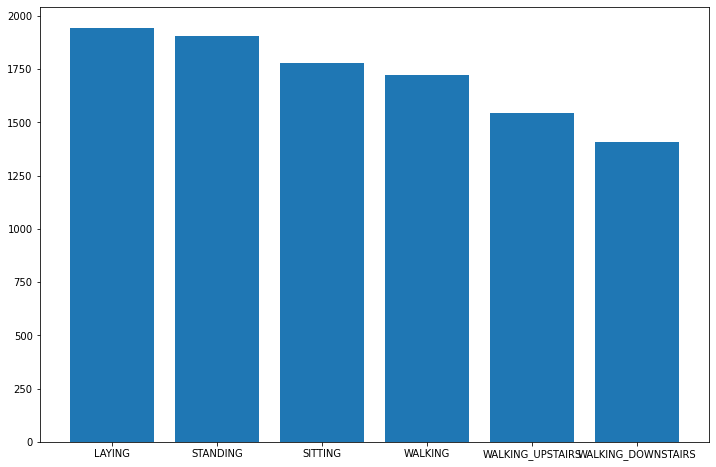

In [18]:
activity = both['Activity']
label_counts = activity.value_counts()

plt.figure(figsize= (12, 8))
plt.bar(label_counts.index, label_counts)

In [19]:
Data = both['Data']
Subject = both['subject']
train = both.copy()
train = train.drop(['Data','subject','Activity'], axis =1)

In [ ]:
print(train)

## Scaleing

In [20]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
slc = StandardScaler()
train = slc.fit_transform(train)

# dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9, random_state=0)
train = pca.fit_transform(train)

# print(train)

## Splitting the dataset into the Training set and Test set

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, activity, test_size = 0.2, random_state = 0)

# Activity Recognition Algorithm

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       377
           SITTING       0.92      0.87      0.90       364
          STANDING       0.89      0.93      0.91       390
           WALKING       0.96      0.99      0.97       335
WALKING_DOWNSTAIRS       0.99      0.95      0.97       278
  WALKING_UPSTAIRS       0.98      0.98      0.98       316

          accuracy                           0.95      2060
         macro avg       0.96      0.95      0.95      2060
      weighted avg       0.95      0.95      0.95      2060



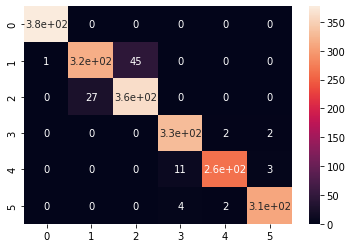

In [ ]:
# Test options and evaluation metric
num_folds = 10
seed = 0
scoring = 'accuracy'
results = {}
accuracy = {}

# Finalizing the model and comparing the test, predict results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score


from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(algorithm= 'auto', n_neighbors= 8, p= 1, weights= 'distance')

_ = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
results["GScv"] = (_.mean(), _.std())

model.fit(X_train, y_train) 
y_predict = model.predict(X_test)

accuracy["GScv"] = accuracy_score(y_test, y_predict)

print(classification_report(y_test, y_predict))

cm= confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [ ]:

# Test options and evaluation metric
num_folds = 10
seed = 0
scoring = 'accuracy'
results = {}
accuracy = {}

# Finalizing the model and comparing the test, predict results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score

import autosklearn.classification

tic = time.perf_counter()
model = autosklearn.classification.AutoSklearnClassifier()

_ = cross_val_score(model, X_train, y_train, cv=10, scoring=scoring)
results["GScv"] = (_.mean(), _.std())

model.fit(X_train, y_train) 
y_predict = model.predict(X_test)

accuracy["GScv"] = accuracy_score(y_test, y_predict)

print(classification_report(y_test, y_predict))

cm= confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

toc = time.perf_counter()
tictoc = toc - tic

In [ ]:
print(f"Trained in {toc - tic:0.4f} seconds")

In [23]:
import autosklearn.classification
cls = autosklearn.classification.AutoSklearnClassifier()
tic = time.perf_counter()
cls.fit(X_train, y_train)
toc = time.perf_counter()
predictions = cls.predict(X_test)
print(f"Trained in {toc - tic:0.4f} seconds")

Trained in 3596.9696 seconds


                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       377
           SITTING       0.93      0.95      0.94       364
          STANDING       0.95      0.94      0.94       390
           WALKING       0.99      0.99      0.99       335
WALKING_DOWNSTAIRS       0.99      0.98      0.99       278
  WALKING_UPSTAIRS       0.98      0.99      0.99       316

          accuracy                           0.97      2060
         macro avg       0.98      0.97      0.97      2060
      weighted avg       0.97      0.97      0.97      2060



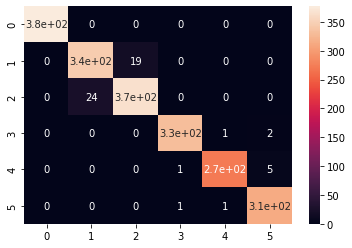

In [24]:

# Test options and evaluation metric
num_folds = 10
seed = 0
scoring = 'accuracy'
results = {}
accuracy = {}

# Finalizing the model and comparing the test, predict results
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score


# _ = cross_val_score(cls, X_train, y_train, cv=10, scoring=scoring)
# results["GScv"] = (_.mean(), _.std())

# model.fit(X_train, y_train) 
# y_predict = model.predict(X_test)

predictions = cls.predict(X_test)

accuracy["GScv"] = accuracy_score(y_test, predictions)

print(classification_report(y_test, predictions))

cm= confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True)

